In [ ]:
## Pesonal end to end project on the titanic dataset using Logistic regression, decision tree, svm and random forest.


In [47]:
#importing my libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
#importing my dataset
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# since alot of this columns are not necessary in my analysis, i can either choose to drop them or create a new dataframe 
# containing the columns i need. I will go with the latter.

In [49]:
Titanic_N=titanic[["Survived","Pclass","Sex","Age","Fare"]]
Titanic_N.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [50]:
# random, lemme know the ratio of men to women on the ship
d= Titanic_N["Sex"].value_counts().to_frame()
d

,Sex
male,577
female,314


In [19]:
# d.rename(columns={"Sex":"Gender"},inplace=True)
# d

### EDA

In [61]:
# Performing exploratory data analysis to get to know my data
Titanic_N.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [62]:
Titanic_N.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,13.002015,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [52]:
Titanic_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


.info() shows that i have 177 null values in the Age column. Taking a closer look at it

In [53]:
Titanic_N["Age"].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [54]:
# using the mean to fill the missing values

med=Titanic_N["Age"].mean()
med
Titanic_N.fillna(value=med,inplace=True)

In [63]:
Titanic_N.isna().sum()

#now, there is no more missing values.

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

### Univariate analysis

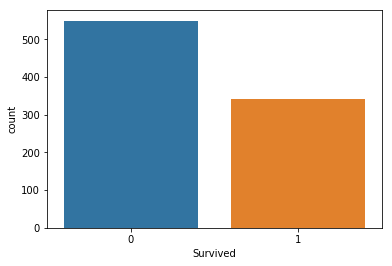

In [58]:
sns.countplot("Survived",data = Titanic_N)

In [59]:
Titanic_N["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


from the chart we can see that only 62% of the total ship borders survived

Next, i would perform a univariate analysis on age, to find out what age groups we have on board
,But first i would need to bin the ages into 3 groups to be able to work with them.


In [80]:
b=np.linspace(min(Titanic_N["Age"]),max(Titanic_N["Age"]),5)
b


array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ])

Now i have created 3 agegrades

children: 0-20
young adults:20-40
adults:40-60
old adults:>60

In [82]:
b=np.linspace(min(Titanic_N["Age"]),max(Titanic_N["Age"]),5)
b

group_names=["Children", "young adults","adults","Older adults"]

Titanic_N["Agegrade"]=pd.cut(Titanic_N["Age"],b,labels=group_names,include_lowest=True)

C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
Titanic_N["Agegrade"].head()

0    young adults
1    young adults
2    young adults
3    young adults
4    young adults
Name: Agegrade, dtype: category
Categories (4, object): [Children < young adults < adults < Older adults]

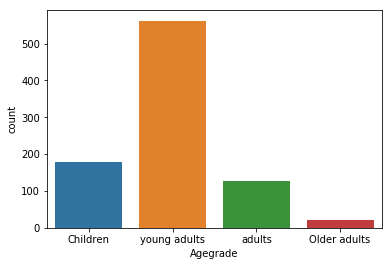

In [85]:
sns.countplot("Agegrade",data = Titanic_N)

from the count plot we can see that we have much more of young adults between the 
ages 20-40 on board, so there would tend to be a bias towards them.

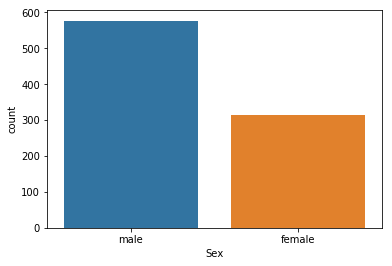

In [86]:
sns.countplot("Sex",data = Titanic_N)

In [ ]:
There were also more male onboard than females, in a ratio of 2:1

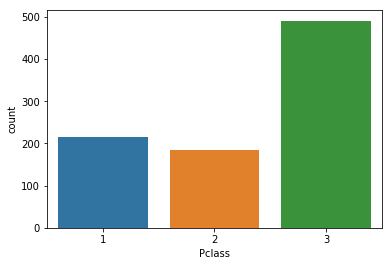

In [88]:
sns.countplot("Pclass",data = Titanic_N)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271E434B1D0>,
      dtype=object)

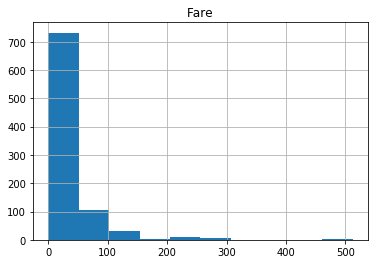

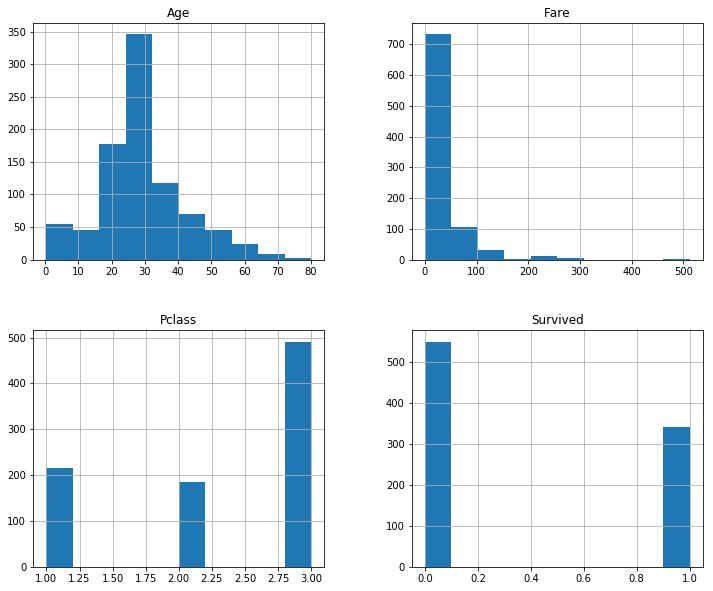

In [91]:
Titanic_N[['Fare']].hist()
Titanic_N.hist(figsize=(12,10))

### Bivariate data analysis

To explore the relationship between the in dividual features if there be any.


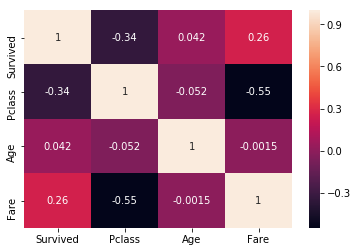

In [140]:
sns.heatmap(Titanic_N.corr(), annot=True)

There is a very minimal correlation between the individual features of the data

In [152]:
# import statsmodels as stats

# pearson_coef, p_value=stats.pearsonr(df["Survived"],Titanic["Age"])

(0, 1.1191617096987931)

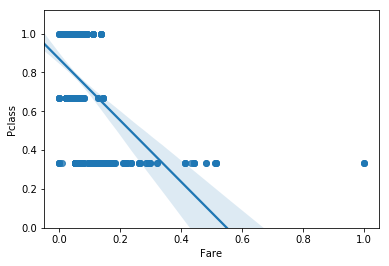

In [148]:
sns.regplot(x="Fare",y="Pclass", data=Titanic_N)
plt.ylim(0,)

(0, 1.0838904536268092)

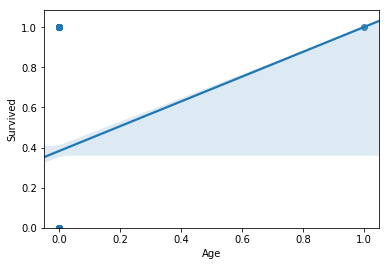

In [142]:
sns.regplot(x="Age",y="Survived", data=Titanic_N)
plt.ylim(0,)

### Normalizing the data using Simple feature scaling

The age and fare are much higher than the other columns and this will make them weigh more on the model, thus i need to normalize the data, and to achieve this i will mnake use of the sim[ple feature scaling.]

In [146]:
Titanic_N["Age"]=(Titanic_N["Age"]-Titanic_N["Age"].min())/(Titanic_N["Age"].max()-Titanic_N["Age"].min())

C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
Titanic_N["Fare"]=Titanic_N["Fare"]/Titanic_N["Fare"].max()

C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
Titanic_N["Pclass"]=Titanic_N["Pclass"]/Titanic_N["Pclass"].max()

C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
Titanic_N.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Agegrade'], dtype='object')

In [147]:
Titanic_N["Age"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
861    0.0
862    0.0
863    0.0
864    0.0
865    0.0
866    0.0
867    0.0
868    0.0
869    0.0
870    0.0
871    0.0
872    0.0
873    0.0
874    0.0
875    0.0
876    0.0
877    0.0
878    0.0
879    0.0
880    0.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Age, Length: 891, dtype: float64

## Data Modelling and Prediction

#### Preprocessing.
x= features
y=target

In [131]:
x=Titanic_N.drop(columns=["Survived","Agegrade"])
x.head()

y=Titanic_N["Survived"]
y.head().to_frame()


#I splitted my data into target and features. Target signifying what i am to
#predict.

,Survived
0,0
1,1
2,1
3,1
4,0


In [132]:
x.head()

,Pclass,Sex,Age,Fare
0,1.000000,male,0.0,0.014151
1,0.333333,female,0.0,0.139136
2,1.000000,female,0.0,0.015469
3,0.333333,female,0.0,0.103644
4,1.000000,male,0.0,0.015713


### importing ML models

In [172]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report




In [166]:
#onverting the categorical data (sex) into numerical data

 

x["Sex"]=LabelEncoder().fit_transform(x['Sex'])

In [168]:
Titanic_N["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [170]:
x.head()

,Pclass,Sex,Age,Fare
0,1.000000,1,0.0,0.014151
1,0.333333,0,0.0,0.139136
2,1.000000,0,0.0,0.015469
3,0.333333,0,0.0,0.103644
4,1.000000,1,0.0,0.015713


In [175]:
#next is to split my data into training and testing data

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=4)

In [178]:
print("x_train is: ",x_train.shape)
print("y_train is: ",y_train.shape)

x_train is:  (712, 4)
y_train is:  (712,)


## <font color = 'Green'>Models used<font>
    
 this is a classification problem as we are trying to predict if a person will survive or not based on their features, so i will use they following prediction models:
 
LogisticRegression

DecisionTree

RandomForest

SVM

KNN

### <font color = "Green">Logistic Regression model<font>

In [181]:
from sklearn.linear_model import LogisticRegression

In [183]:
model=LogisticRegression()

model.fit(x_train,y_train)

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [189]:
x_pred=model.predict(x_test)

x_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [190]:
model.intercept_

array([2.50999854])

In [191]:
model.coef_

array([[-2.11455331, -2.39140314,  0.50656078,  0.91280805]])

In [195]:
model.score(x_test,y_test)

#the decision tree model gives us an accuracy of 80%.ITS good!

0.8100558659217877

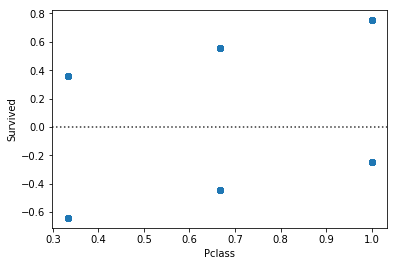

In [198]:
#visualising the model using regressionplot

sns.residplot(Titanic_N["Pclass"],Titanic_N["Survived"])

In [205]:
clas=classification_report(y_test,x_pred)
print(clas)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       119
           1       0.75      0.65      0.70        60

   micro avg       0.81      0.81      0.81       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.81      0.81      0.81       179



In [206]:
conf=confusion_matrix(y_test,x_pred)
conf

array([[106,  13],
       [ 21,  39]], dtype=int64)

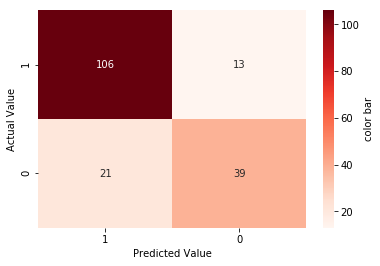

In [208]:
sns.heatmap(conf, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

from the confusion matrix, we can see that the model made 145 correct predictions
and 34 wrong predictions, so Logistic regression is a suitable model for the 
problem

### <font color = "Green">Decision tree model<font>

In [211]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=4)

In [217]:
#fit the model
dt.fit(x_train,y_train)

X_pred=dt.predict(x_test)
X_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [219]:
# model score
dt_score = dt.score(x_test,y_test)
dt_score

0.8268156424581006

In [220]:
print(classification_report(y_test,X_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       119
           1       0.77      0.68      0.73        60

   micro avg       0.83      0.83      0.83       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.83      0.82       179



In [224]:
c=confusion_matrix(y_test,X_pred)
print(c)

[[107  12]
 [ 19  41]]


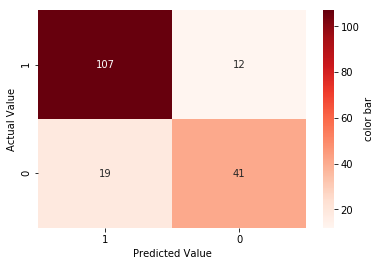

In [225]:
sns.heatmap(c, annot = True, cmap='Reds', 
            cbar_kws = {"label":"color bar"}, fmt='g',
            xticklabels = [1,0], yticklabels = [1,0])
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value");

The decision tree model performed slightly better than the logisticregression model with an accuracy of 82%

### <font color = "Green">RandomForest model<font>

In [234]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
rf=RandomForestClassifier(criterion="entropy", random_state=4)

rf.fit(x_train,y_train)

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=4, verbose=0, warm_start=False)

In [240]:
x_pred=rf.predict(x_test)

In [245]:
rf.score(x_test,y_test)

0.8379888268156425

In [247]:
print(classification_report(y_test,X_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       119
           1       0.77      0.68      0.73        60

   micro avg       0.83      0.83      0.83       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.83      0.82       179



In [250]:
c=confusion_matrix(y_test,x_pred)
print(c)

[[110   9]
 [ 20  40]]


The random forest performed better than the previous 2 

### <font color = "Green">SVM model<font>

In [252]:
from sklearn.svm import SVC

svmc = SVC()


In [253]:
svmc.fit(x_train,y_train)

C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [256]:
svmcc=svmc.predict(x_test)

In [257]:
svmc.score(x_test,y_test)

0.8100558659217877

In [259]:
print(classification_report(svmcc,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       127
           1       0.65      0.75      0.70        52

   micro avg       0.81      0.81      0.81       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.82      0.81      0.81       179



In [261]:
print(confusion_matrix(svmcc,y_test))

[[106  21]
 [ 13  39]]


In [262]:
 From the prediction of the above models, we see that the all gave an accuracy of a bove 80%, meaning that either of the following wohld be suitable for theproblem. But personally, i would choose to work with the randomforest model as it gave the highest accuracy.
    
    Thanks for going through my work!

SyntaxError: invalid syntax (<ipython-input-262-8c1d63293aa1>, line 1)